In [1]:
import sqlite3
import pandas as pd
import numpy as np
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
# connect to db

In [2]:
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [ ]:
# check table names

In [3]:
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
print(cur.fetchall())

[('Employee',), ('Category',), ('Customer',), ('Shipper',), ('Supplier',), ('Order',), ('Product',), ('OrderDetail',), ('CustomerCustomerDemo',), ('CustomerDemographic',), ('Region',), ('Territory',), ('EmployeeTerritory',)]


In [ ]:
# check column names - for personal exploration

In [4]:
db_filename = 'Northwind_small.sqlite'
newline_indent = '\n   '

db=sqlite3.connect(db_filename)
db.text_factory = str
cur = db.cursor()

result = cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
table_names = sorted(list(zip(*result))[0])
print ("\ntables are:"+newline_indent+newline_indent.join(table_names))

for table_name in table_names:
    result = cur.execute("PRAGMA table_info('%s')" % table_name).fetchall()
    column_names = list(zip(*result))[1]
    print (("\ncolumn names for %s:" % table_name)
           +newline_indent
           +(newline_indent.join(column_names)))

db.close()
print ("\nexiting.")


tables are:
   Category
   Customer
   CustomerCustomerDemo
   CustomerDemographic
   Employee
   EmployeeTerritory
   Order
   OrderDetail
   Product
   Region
   Shipper
   Supplier
   Territory

column names for Category:
   Id
   CategoryName
   Description

column names for Customer:
   Id
   CompanyName
   ContactName
   ContactTitle
   Address
   City
   Region
   PostalCode
   Country
   Phone
   Fax

column names for CustomerCustomerDemo:
   Id
   CustomerTypeId

column names for CustomerDemographic:
   Id
   CustomerDesc

column names for Employee:
   Id
   LastName
   FirstName
   Title
   TitleOfCourtesy
   BirthDate
   HireDate
   Address
   City
   Region
   PostalCode
   Country
   HomePhone
   Extension
   Photo
   Notes
   ReportsTo
   PhotoPath

column names for EmployeeTerritory:
   Id
   EmployeeId
   TerritoryId

column names for Order:
   Id
   CustomerId
   EmployeeId
   OrderDate
   RequiredDate
   ShippedDate
   ShipVia
   Freight
   ShipName
   ShipAddress
  

In [5]:
# selecting all data from the order details column
# adding columns for Revenue, Discount in $, Whether discount or not, Grouping discounts

In [346]:
cur.execute("""SELECT *,
                od.UnitPrice * od.Quantity AS 'ListRev',
                od.UnitPrice * (1 - od.Discount) * od.Quantity AS 'GrossRev',
                od.Discount * od.UnitPrice * od.Quantity AS 'DiscVal',
                    CASE 
                    WHEN od.Discount == 0 THEN 0
                    ELSE 1 
                    END AS 'Disc_0_1'
                FROM [OrderDetail] od;""")
ord_det = pd.DataFrame(cur.fetchall())
ord_det.columns = [i[0] for i in cur.description]
ord_det.head(8)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,ListRev,GrossRev,DiscVal,Disc_0_1
0,10248/11,10248,11,14.0,12,0.00,168.0,168.0,0.0,0
1,10248/42,10248,42,9.8,10,0.00,98.0,98.0,0.0,0
2,10248/72,10248,72,34.8,5,0.00,174.0,174.0,0.0,0
3,10249/14,10249,14,18.6,9,0.00,167.4,167.4,0.0,0
4,10249/51,10249,51,42.4,40,0.00,1696.0,1696.0,0.0,0
5,10250/41,10250,41,7.7,10,0.00,77.0,77.0,0.0,0
6,10250/51,10250,51,42.4,35,0.15,1484.0,1261.4,222.6,1
7,10250/65,10250,65,16.8,15,0.15,252.0,214.2,37.8,1


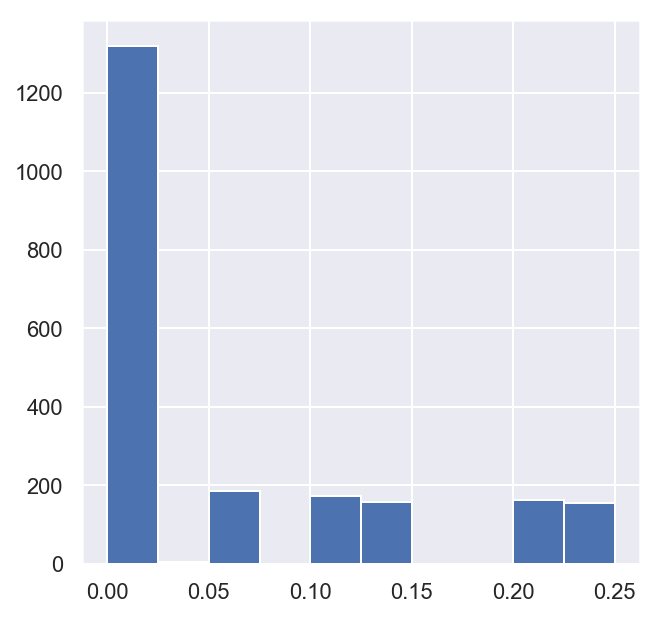

In [347]:
# table as a histogram

ord_det.Discount.hist(figsize = (5,5));

In [ ]:
# Inspecting the distribution of discount. Not that many groups. Let's also check the count for each discount

In [7]:
ord_det['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [ ]:
# More than half have no discount, evenly split for 5, 10 , 15, 20 ,25. 
# There are some small discount levels with very quantities that don't show up on the histogram

In [ ]:
# how to do in pandas - no longer necessary

In [46]:
ord_det['ListRev'] = ord_det['UnitPrice'] * ord_det['Quantity']

In [48]:
ord_det['GrossRev'] = ord_det['UnitPrice'] * ord_det['Quantity'] * (1 - (ord_det['Discount']))

In [53]:
ord_det['Disc_Val'] = ord_det['ListRev'] - ord_det['GrossRev']

In [50]:
ord_det['Disc_0_1'] = np.where(ord_det['Discount'] == 0, 0, 1)

In [55]:
ord_det.head(12)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,ListRev,GrossRev,Disc_0_1,Disc_Val
0,10248/11,10248,11,14.0,12,0.00,168.0,168.00,0,0.00
1,10248/42,10248,42,9.8,10,0.00,98.0,98.00,0,0.00
2,10248/72,10248,72,34.8,5,0.00,174.0,174.00,0,0.00
3,10249/14,10249,14,18.6,9,0.00,167.4,167.40,0,0.00
4,10249/51,10249,51,42.4,40,0.00,1696.0,1696.00,0,0.00
5,10250/41,10250,41,7.7,10,0.00,77.0,77.00,0,0.00
6,10250/51,10250,51,42.4,35,0.15,1484.0,1261.40,1,222.60
7,10250/65,10250,65,16.8,15,0.15,252.0,214.20,1,37.80
8,10251/22,10251,22,16.8,6,0.05,100.8,95.76,1,5.04
9,10251/57,10251,57,15.6,15,0.05,234.0,222.30,1,11.70


In [ ]:
# Investigating the smallest distribution of discounts
# First filter on the discount level: 1%, 2%, 3%, 4%, 6%

In [343]:
ord_det.loc[(ord_det['Discount'] <= 0.06) & (ord_det['Discount'] != 0.05) & (ord_det['Discount'] != 0.00)]

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,ListRev,GrossRev,DiscVal,Disc_0_1,Disc_Group
2133,11077/6,11077,6,25.00,1,0.02,25.00,24.5000,0.5000,1,0.05
2139,11077/14,11077,14,23.25,1,0.03,23.25,22.5525,0.6975,1,0.05
2140,11077/16,11077,16,17.45,2,0.03,34.90,33.8530,1.0470,1,0.05
2141,11077/20,11077,20,81.00,1,0.04,81.00,77.7600,3.2400,1,0.05
2146,11077/46,11077,46,12.00,3,0.02,36.00,35.2800,0.7200,1,0.05
2149,11077/60,11077,60,34.00,2,0.06,68.00,63.9200,4.0800,1,0.05
2150,11077/64,11077,64,33.25,2,0.03,66.50,64.5050,1.9950,1,0.05
2152,11077/73,11077,73,15.00,2,0.01,30.00,29.7000,0.3000,1,0.05


In [ ]:
# That's strange they all have the same order number. Let's look at the total order to see if that gives us any clues

In [348]:
ord_11077 = ord_det[(ord_det['OrderId'] == 11077)]
ord_11077.sort_values(by=['Discount', 'Quantity'], ascending=False)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,ListRev,GrossRev,DiscVal,Disc_0_1
2130,11077/2,11077,2,19.00,24,0.20,456.00,364.8000,91.2000,1
2135,11077/8,11077,8,40.00,2,0.10,80.00,72.0000,8.0000,1
2149,11077/60,11077,60,34.00,2,0.06,68.00,63.9200,4.0800,1
2137,11077/12,11077,12,38.00,2,0.05,76.00,72.2000,3.8000,1
2144,11077/39,11077,39,18.00,2,0.05,36.00,34.2000,1.8000,1
2134,11077/7,11077,7,30.00,1,0.05,30.00,28.5000,1.5000,1
2141,11077/20,11077,20,81.00,1,0.04,81.00,77.7600,3.2400,1
2140,11077/16,11077,16,17.45,2,0.03,34.90,33.8530,1.0470,1
2150,11077/64,11077,64,33.25,2,0.03,66.50,64.5050,1.9950,1
2139,11077/14,11077,14,23.25,1,0.03,23.25,22.5525,0.6975,1


In [ ]:
# nothing jumps out as unusual, how about by product and Category

In [349]:
cur.execute("""SELECT OrderId, ProductId, od.UnitPrice, Quantity, Discount,
                ProductName, CategoryId,
                CategoryName
                FROM [OrderDetail] od
                JOIN [Product] p
                ON od.ProductId = p.Id
                JOIN Category c
                ON c.Id = p.CategoryId
                WHERE OrderId == '11077' 
                AND Discount >= '0.01' AND Discount <= '0.06' AND Discount != '0.05' """);
                      
what_prod_df = pd.DataFrame(cur.fetchall())
what_prod_df.columns = [i[0] for i in cur.description]
what_prod_df.sort_values(by=['CategoryName'])

,OrderId,ProductId,UnitPrice,Quantity,Discount,ProductName,CategoryId,CategoryName
0,11077,6,25.00,1,0.02,Grandma's Boysenberry Spread,2,Condiments
2,11077,16,17.45,2,0.03,Pavlova,3,Confections
3,11077,20,81.00,1,0.04,Sir Rodney's Marmalade,3,Confections
5,11077,60,34.00,2,0.06,Camembert Pierrot,4,Dairy Products
6,11077,64,33.25,2,0.03,Wimmers gute Semmelknödel,5,Grains/Cereals
1,11077,14,23.25,1,0.03,Tofu,7,Produce
4,11077,46,12.00,3,0.02,Spegesild,8,Seafood
7,11077,73,15.00,2,0.01,Röd Kaviar,8,Seafood


In [ ]:
# Covers multiple catageories and different discounts within each. 
# Let's see who placed the order, and we'll follow up with a question to them

In [233]:
cur.execute("""SELECT DISTINCT OrderId,
                FirstName, LastName, Title, City, Country
                FROM [OrderDetail] od
                LEFT JOIN [Order] o
                ON od.OrderId = o.Id
                LEFT JOIN Employee e
                ON o.EmployeeId = e.Id
                WHERE OrderId == '11077' """);
                      
Who_df = pd.DataFrame(cur.fetchall())
Who_df.columns = [i[0] for i in cur.description]
Who_df

,OrderId,FirstName,LastName,Title,City,Country
0,11077,Nancy,Davolio,Sales Representative,Seattle,USA


In [ ]:
# Question for Nancy Davolio. Why does this order have unusual discounts?

In [ ]:
# There are not a lot of these. I'm going to include them with the lowest discount level of 5%. 
# Query the database and create a new column that groups the discounts in 5% increments. (Only changing 1,2,3,4,6%)

In [350]:
cur.execute("""SELECT *,
                od.UnitPrice * od.Quantity AS 'ListRev',
                od.UnitPrice * (1 - od.Discount) * od.Quantity AS 'GrossRev',
                od.Discount * od.UnitPrice * od.Quantity AS 'DiscVal',
                    CASE 
                    WHEN od.Discount == 0 THEN 0
                    ELSE 1 
                    END AS 'Disc_0_1',
                    CASE
                    WHEN od.Discount BETWEEN 0.01 AND 0.06 THEN 0.05
                    ELSE od.Discount
                    END AS 'Disc_Group'
                FROM [OrderDetail] od;""")
ord_det = pd.DataFrame(cur.fetchall())
ord_det.columns = [i[0] for i in cur.description]
ord_det.head(8)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,ListRev,GrossRev,DiscVal,Disc_0_1,Disc_Group
0,10248/11,10248,11,14.0,12,0.00,168.0,168.0,0.0,0,0.00
1,10248/42,10248,42,9.8,10,0.00,98.0,98.0,0.0,0,0.00
2,10248/72,10248,72,34.8,5,0.00,174.0,174.0,0.0,0,0.00
3,10249/14,10249,14,18.6,9,0.00,167.4,167.4,0.0,0,0.00
4,10249/51,10249,51,42.4,40,0.00,1696.0,1696.0,0.0,0,0.00
5,10250/41,10250,41,7.7,10,0.00,77.0,77.0,0.0,0,0.00
6,10250/51,10250,51,42.4,35,0.15,1484.0,1261.4,222.6,1,0.15
7,10250/65,10250,65,16.8,15,0.15,252.0,214.2,37.8,1,0.15


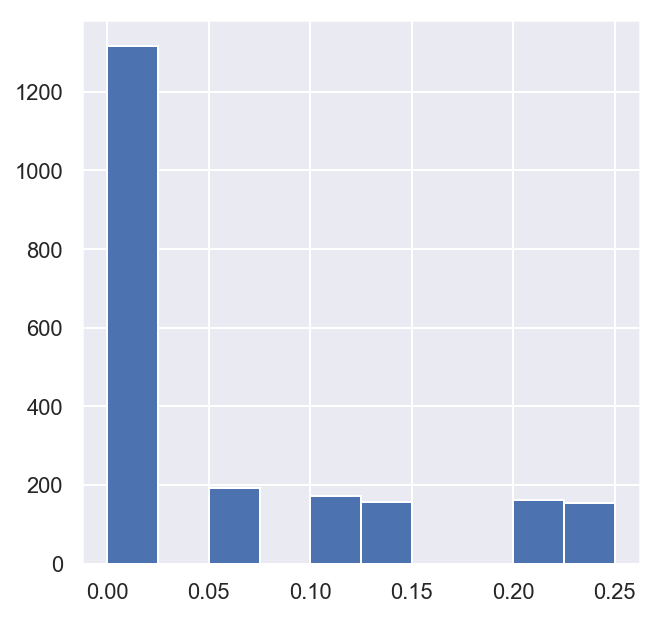

In [241]:
ord_det.Disc_Group.hist(figsize = (5,5));

In [ ]:
# Separate the data into discounted and non discounted

In [242]:
disc = ord_det[ord_det['Discount']>0]
no_disc = ord_det[ord_det['Discount']==0]

In [342]:
disc.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,ListRev,GrossRev,DiscVal,Disc_0_1,Disc_Group
6,10250/51,10250,51,42.4,35,0.15,1484.0,1261.40,222.60,1,0.15
7,10250/65,10250,65,16.8,15,0.15,252.0,214.20,37.80,1,0.15
8,10251/22,10251,22,16.8,6,0.05,100.8,95.76,5.04,1,0.05
9,10251/57,10251,57,15.6,15,0.05,234.0,222.30,11.70,1,0.05
11,10252/20,10252,20,64.8,40,0.05,2592.0,2462.40,129.60,1,0.05


In [244]:
len(ord_det), len(no_disc), len(disc)

(2155, 1317, 838)

In [ ]:
# placeholder for violin plot by discount group

In [11]:
# test to see if the distributions are normal

In [12]:
stat.normaltest(disc['Quantity'])

NormaltestResult(statistic=261.528012299789, pvalue=1.6214878452829618e-57)

In [13]:
stat.normaltest(no_disc['Quantity'])

NormaltestResult(statistic=544.5770045551502, pvalue=5.579637380545965e-119)

In [351]:
# tiny p-values. We reject the null hypothesis of this test that the distribution is normal.
# Let's inspect visually

In [14]:
# naming the discount / non discount series for simplicty
Discount_Qty = disc['Quantity']
No_Discount_Qty = no_disc['Quantity']

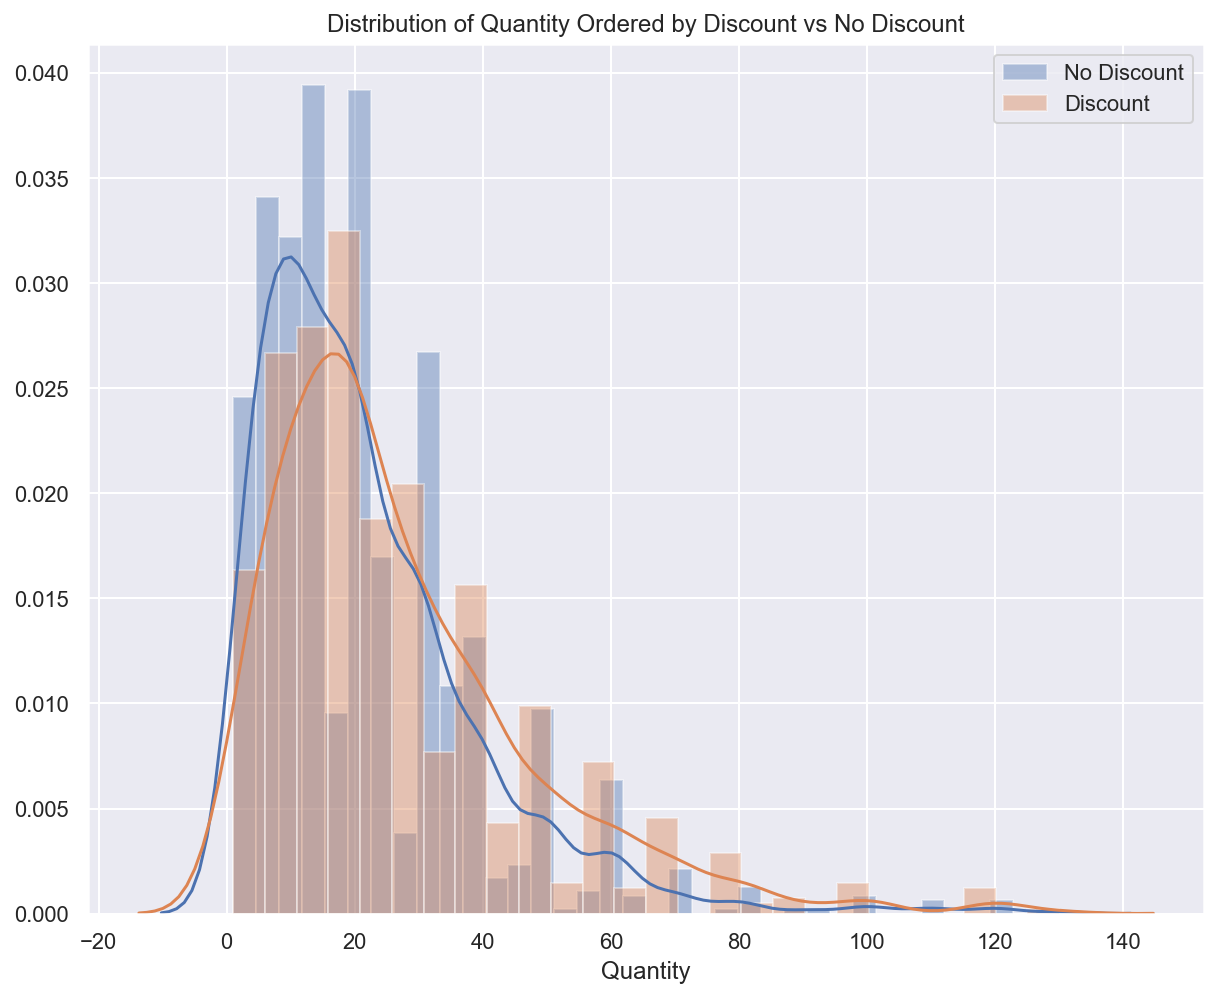

In [30]:
# Draw a plot showing overlapping of distribution means and sds for inspection

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(No_Discount_Qty, label='No Discount') # blue dist
sns.distplot(Discount_Qty, label='Discount') # orange dist
plt.title('Distribution of Quantity Ordered by Discount vs No Discount')
plt.legend()
plt.show();

In [ ]:
# the actual test
# placeholder for our hypo
# what we are going to test. and why

In [ ]:
# Welch's ttest

In [339]:
Welch_ttest = stat.ttest_ind(No_Discount_Qty, Discount_Qty, equal_var=False)
print(Welch_ttest)
print("This is a 2-tail test. To get the p-value for a one-tail test we divide by 2. \nP-value is:", 
      round(Welch_ttest[1]/2,14))

Ttest_indResult(statistic=-6.239069142123973, pvalue=5.65641429030433e-10)
This is a 2-tail test. To get the p-value for a one-tail test we divide by 2. 
P-value is: 2.8282e-10


In [245]:
# Welch's t statistic - how to calculate manually

import numpy as np
import scipy.stats as stats

def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. This function returns the degrees of freedom """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


def p_value_welch_ttest(a, b, two_sided=False):
    """Calculates the p-value for Welch's t-test given two samples.
    By default, the returned p-value is for a one-sided t-test. 
    Set the two-sided parameter to True if you wish to perform a two-sided t-test instead.
    """
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [316]:
p_value_welch_ttest(Discount_Qty, No_Discount_Qty)

2.8282065578366655e-10

In [ ]:
# Note - this is 2 tail p-value, divide by 2 to one-tail p-value
# Reject Null, less than 0.05. Discounts have an effect

In [ ]:
# Now look at the effect size.

In [ ]:
# Effect Size
# Cohen's D

In [247]:
# Detailed formula

def Cohen_d(group1, group2):
    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [252]:
Cohen_d(No_Discount_Qty, Discount_Qty)

-0.2862724481729283

In [253]:
# simplified formula
from statistics import mean, stdev
from math import sqrt

# test conditions
c0 = No_Discount_Qty
c1 = Discount_Qty

cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

print(cohens_d)

-0.2808343193296605


In [ ]:
# interpretation: Small effect

In [ ]:
# Test is there an effect at different discount levels?

# One-way Anova

In [258]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [264]:
f1 = 'Disc_Group'
f2 = 'Quantity'

In [265]:
formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, ord_det).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq      df         F        PR(>F)
C(Disc_Group)   15969.214452     5.0  8.990431  1.816734e-08
Residual       763430.421743  2149.0       NaN           NaN


In [ ]:
# Intrepretation

In [ ]:
# Which discount levels are different

# Tukey test

In [271]:
mc = MultiComparison(ord_det.Quantity, ord_det.Disc_Group)
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    0.05   5.207    1.0635  9.3506  True 
 0.0    0.1    3.5217  -0.8257  7.8692 False 
 0.0    0.15   6.6669   2.1279 11.2059  True 
 0.0    0.2    5.3096   0.8212  9.7979  True 
 0.0    0.25   6.525    1.9467 11.1033  True 
 0.05   0.1   -1.6853  -7.3138  3.9432 False 
 0.05   0.15   1.4599  -4.3179  7.2377 False 
 0.05   0.2    0.1026  -5.6355  5.8406 False 
 0.05   0.25   1.318   -4.4907  7.1267 False 
 0.1    0.15   3.1452  -2.7805  9.0709 False 
 0.1    0.2    1.7879  -4.0991  7.6748 False 
 0.1    0.25   3.0033  -2.9526  8.9591 False 
 0.15   0.2   -1.3573  -7.3872  4.6725 False 
 0.15   0.25  -0.1419   -6.239  5.9552 False 
 0.2    0.25   1.2154  -4.8441  7.2749 False 
---------------------------------------------
[0.   0.05 0.1  0.15 0.2  0.25]


In [ ]:
# intrepretation

In [ ]:
# Multiple ttests - for my benefit. This is bad practice

In [340]:
for group in ord_det.groupby(['Disc_Group'])['Quantity']:
    group_name = group[0]
    print(group_name)

0.0
0.05
0.1
0.15
0.2
0.25


In [311]:
from itertools import combinations

groups = [group[0] for group in ord_det.groupby(['Disc_Group'])['Quantity']]
combos = combinations(groups, 2)
for combo in combos:
    supp1 = combo[0]
    supp2 = combo[1]
    sample1 = ord_det[(ord_det.Disc_Group == supp1)]['Quantity']
    sample2 = ord_det[(ord_det.Disc_Group == supp2)]['Quantity']
    p = stats.ttest_ind(sample1, sample2, equal_var=False)
    print(combo, p)

(0.0, 0.05) Ttest_indResult(statistic=-3.10073174596259, pvalue=0.002173852505397794)
(0.0, 0.1) Ttest_indResult(statistic=-2.094434281933477, pvalue=0.0374559661063408)
(0.0, 0.15) Ttest_indResult(statistic=-3.8356620426605934, pvalue=0.00017220729443627393)
(0.0, 0.2) Ttest_indResult(statistic=-3.4021239132172787, pvalue=0.0008110033254043408)
(0.0, 0.25) Ttest_indResult(statistic=-3.8572676240072523, pvalue=0.00015923050922125637)
(0.05, 0.1) Ttest_indResult(statistic=0.7403375542812324, pvalue=0.45957397648726306)
(0.05, 0.15) Ttest_indResult(statistic=-0.6296559791264749, pvalue=0.5293411366125689)
(0.05, 0.2) Ttest_indResult(statistic=-0.04686205850705941, pvalue=0.9626497462174904)
(0.05, 0.25) Ttest_indResult(statistic=-0.577080728760149, pvalue=0.5642668672376157)
(0.1, 0.15) Ttest_indResult(statistic=-1.3556023920391185, pvalue=0.17616507980479174)
(0.1, 0.2) Ttest_indResult(statistic=-0.8162459699699015, pvalue=0.414945941918507)
(0.1, 0.25) Ttest_indResult(statistic=-1.3140

In [306]:
# Check loop result
disc_10 = ord_det[ord_det['Disc_Group']==0.10]
Discount_10_Qty = disc_10['Quantity']
stat.ttest_ind(No_Discount_Qty, Discount_10_Qty, equal_var=False)

Ttest_indResult(statistic=-2.094434281933477, pvalue=0.0374559661063408)

In [ ]:
# SQL fun

In [ ]:
# Getting data for Categories.
# Test - there is no difference in discount level by Category

In [102]:
cur.execute("""SELECT OrderId, ProductId, od.UnitPrice, Quantity, Discount,
                CategoryId,
                CategoryName
                FROM [OrderDetail] od
                JOIN [Product] p
                ON od.ProductId = p.Id
                JOIN Category c
                ON c.Id = p.CategoryId""");
                      
Cat_df = pd.DataFrame(cur.fetchall())
Cat_df.columns = [i[0] for i in cur.description]
print(len(Cat_df))
Cat_df.head()

2155


,OrderId,ProductId,UnitPrice,Quantity,Discount,CategoryId,CategoryName
0,10248,11,14.0,12,0.0,4,Dairy Products
1,10248,42,9.8,10,0.0,5,Grains/Cereals
2,10248,72,34.8,5,0.0,4,Dairy Products
3,10249,14,18.6,9,0.0,7,Produce
4,10249,51,42.4,40,0.0,7,Produce


In [ ]:
# Getting data for Employees
# There is no discount in revenue by employee
# Discounted vs non-discounted
# Average discount - might need a group by??

In [112]:
cur.execute("""SELECT OrderId, ProductId, UnitPrice, Quantity, Discount,
                LastName, Title, City, Country
                FROM [OrderDetail] od
                JOIN [Order] o
                ON od.OrderId = o.Id
                JOIN Employee e
                ON e.Id = o.EmployeeId""");
                      
Emp_df = pd.DataFrame(cur.fetchall())
Emp_df.columns = [i[0] for i in cur.description]
print(len(Emp_df))
Emp_df.head(10)

2155


,OrderId,ProductId,UnitPrice,Quantity,Discount,LastName,Title,City,Country
0,10248,11,14.0,12,0.00,Buchanan,Sales Manager,London,UK
1,10248,42,9.8,10,0.00,Buchanan,Sales Manager,London,UK
2,10248,72,34.8,5,0.00,Buchanan,Sales Manager,London,UK
3,10249,14,18.6,9,0.00,Suyama,Sales Representative,London,UK
4,10249,51,42.4,40,0.00,Suyama,Sales Representative,London,UK
5,10250,41,7.7,10,0.00,Peacock,Sales Representative,Redmond,USA
6,10250,51,42.4,35,0.15,Peacock,Sales Representative,Redmond,USA
7,10250,65,16.8,15,0.15,Peacock,Sales Representative,Redmond,USA
8,10251,22,16.8,6,0.05,Leverling,Sales Representative,Kirkland,USA
9,10251,57,15.6,15,0.05,Leverling,Sales Representative,Kirkland,USA


In [ ]:
# Getting data for region
# There is no difference in revenue by region

In [399]:
cur.execute("""SELECT OrderId, ProductId, UnitPrice, Quantity, Discount,
                City, Country, Region
                FROM [OrderDetail] od
                LEFT JOIN [Order] o
                ON od.OrderId = o.Id
                LEFT JOIN Customer c
                ON c.Id = o.CustomerId""");
                      
Cust_Reg_df = pd.DataFrame(cur.fetchall())
Cust_Reg_df.columns = [i[0] for i in cur.description]
print(len(Cust_Reg_df))
Cust_Reg_df.head(10)

2155


,OrderId,ProductId,UnitPrice,Quantity,Discount,City,Country,Region
0,10248,11,14.0,12,0.00,Reims,France,Western Europe
1,10248,42,9.8,10,0.00,Reims,France,Western Europe
2,10248,72,34.8,5,0.00,Reims,France,Western Europe
3,10249,14,18.6,9,0.00,Münster,Germany,Western Europe
4,10249,51,42.4,40,0.00,Münster,Germany,Western Europe
5,10250,41,7.7,10,0.00,Rio de Janeiro,Brazil,South America
6,10250,51,42.4,35,0.15,Rio de Janeiro,Brazil,South America
7,10250,65,16.8,15,0.15,Rio de Janeiro,Brazil,South America
8,10251,22,16.8,6,0.05,Lyon,France,Western Europe
9,10251,57,15.6,15,0.05,Lyon,France,Western Europe


In [400]:
Cust_Reg_df.isna().sum()

OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
City         0
Country      0
Region       0
dtype: int64

In [401]:
Cust_Reg_df.OrderId.loc[pd.isnull(Cust_Reg_df.City)].unique()

array([], dtype=int64)

In [398]:
cur.execute("""SELECT DISTINCT CustomerId, c.Id AS Cust_Table_Id, City, Country
                FROM [OrderDetail] od
                LEFT JOIN [Order] o
                ON od.OrderId = o.Id
                LEFT JOIN Customer c
                ON c.Id = o.CustomerId
                WHERE City IS NULL""");
                      
Miss_Reg_df = pd.DataFrame(cur.fetchall())
Miss_Reg_df.columns = [i[0] for i in cur.description]
print(len(Miss_Reg_df))
Miss_Reg_df.head(10)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements

In [380]:
cur.execute("""SELECT Id, CompanyName
                FROM [Customer] 
                WHERE Id LIKE 'DUMO%' 
                OR Id LIKE 'ANTO%'
                OR Id LIKE 'QUEE%' 
                OR Id LIKE 'OCEA%' """);
df = pd.DataFrame(cur.fetchall())
df

,0,1
0,ANTON,Antonio Moreno Taquería
1,DUMON,Du monde entier
2,OCEAN,Océano Atlántico Ltda.
3,QUEEN,Queen Cozinha


In [387]:
# This works for select, but doesn't update

# cur.execute("""SELECT CustomerId,
#                 REPLACE (
#                 REPLACE (
#                 REPLACE (
#                 REPLACE (CustomerId, 'DUMO', 'DUMON'), 
#                 'ANTO', 'ANTON'),
#                 'QUEE', 'QUEEN'),
#                 'OCEA', 'OCEAN')
#                 FROM [Order] """);

In [393]:
cur.execute("""UPDATE [Order] 
                SET CustomerId = 'DUMON'
                WHERE CustomerId = 'DUMO'
                """);

In [395]:
cur.execute("""UPDATE [Order] 
                SET CustomerId = 'ANTON'
                WHERE CustomerId = 'ANTO'
                """);

In [396]:
cur.execute("""UPDATE [Order] 
                SET CustomerId = 'QUEEN'
                WHERE CustomerId = 'QUEE'
                """);

In [397]:
cur.execute("""UPDATE [Order] 
                SET CustomerId = 'OCEAN'
                WHERE CustomerId = 'OCEA'
                """);

In [402]:
cur.execute("""SELECT COUNT(CompanyName), Country, Region 
                FROM [Customer] 
                GROUP BY Country 
                ORDER By Region""");
df = pd.DataFrame(cur.fetchall())
df

,0,1,2
0,1,Ireland,British Isles
1,7,UK,British Isles
2,5,Mexico,Central America
3,1,Poland,Eastern Europe
4,3,Canada,North America
5,13,USA,North America
6,2,Denmark,Northern Europe
7,2,Sweden,Northern Europe
8,2,Finland,Scandinavia
9,1,Norway,Scandinavia


In [403]:
cur.execute("""SELECT Region, COUNT(CompanyName) AS 'Num_Cust'
                FROM [Customer] 
                GROUP BY Region 
                ORDER By Region""");
count_df = pd.DataFrame(cur.fetchall())
count_df.columns = [i[0] for i in cur.description]
count_df

,Region,Num_Cust
0,British Isles,8
1,Central America,5
2,Eastern Europe,1
3,North America,16
4,Northern Europe,4
5,Scandinavia,3
6,South America,16
7,Southern Europe,10
8,Western Europe,28


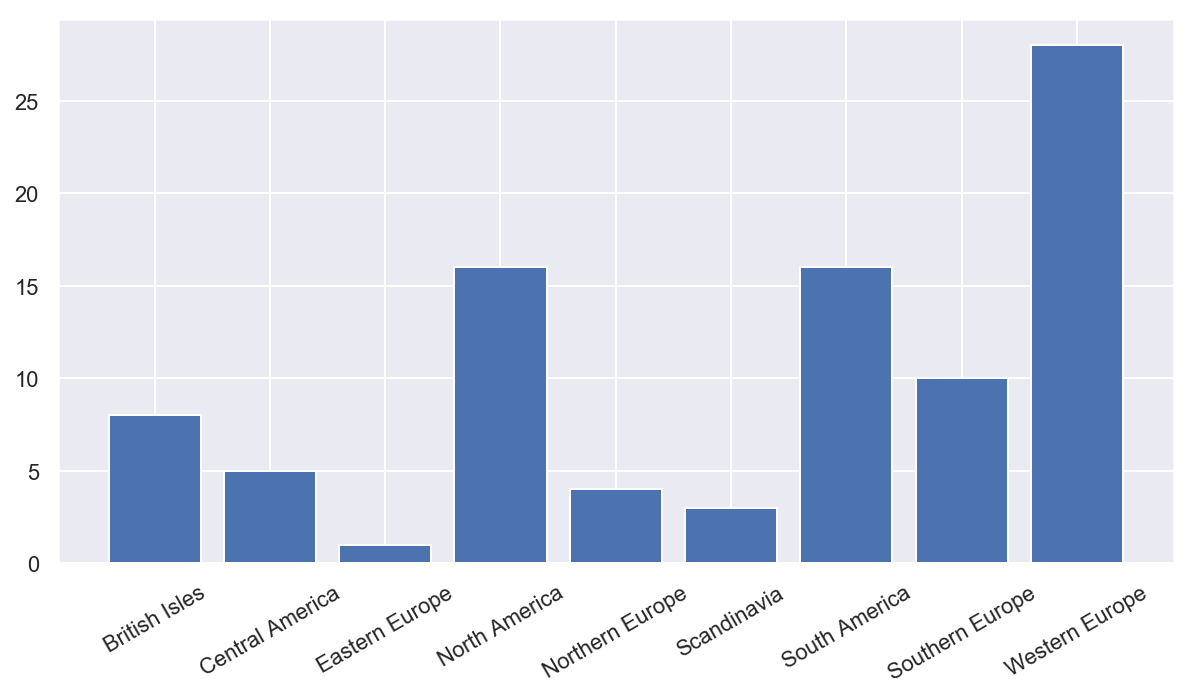

In [174]:
plt.figure(figsize=(10,5))
plt.bar(count_df.Region, count_df.Num_Cust)
plt.xticks(rotation=30)
plt.show();

In [152]:
region_count = cur.execute("""SELECT COUNT(CompanyName), Region 
                FROM [Customer] 
                GROUP BY Region 
                ORDER By Region"""), cur.fetchall();
region_count

(<sqlite3.Cursor at 0x25cedc070a0>,
 [(8, 'British Isles'),
  (5, 'Central America'),
  (1, 'Eastern Europe'),
  (16, 'North America'),
  (4, 'Northern Europe'),
  (3, 'Scandinavia'),
  (16, 'South America'),
  (10, 'Southern Europe'),
  (28, 'Western Europe')])

In [ ]:
# regroup region Nth Europe, Latin America

In [ ]:
# Super test - employee by region ... doesn't work, many to many joins
# Delete this before draft to Victor

In [179]:
cur.execute("""SELECT OrderId, ProductId, UnitPrice, Quantity, Discount,
                c.City, c.Country, c.Region r.RegionDescription
                FROM [OrderDetail] od
                LEFT JOIN [Order] o
                ON od.OrderId = o.Id
                LEFT JOIN [Customer] c
                ON c.Id = o.CustomerId
                LEFT JOIN [Employee] e
                ON e.Id = o.EmployeeId
                LEFT JOIN [EmployeeTerritory] et
                ON e.Id = et.EmployeeId
                LEFT JOIN [Territory] t
                ON t.Id = et.TerritoryId
                LEFT JOIN [Region] r
                ON r.Id = t.RegionId""");
                      
Cust_Reg_df = pd.DataFrame(cur.fetchall())
Cust_Reg_df.columns = [i[0] for i in cur.description]
print(len(Cust_Reg_df))
Cust_Reg_df.head(10)

OperationalError: near ".": syntax error

In [ ]:
cur.execute("""SELECT OrderId, ProductId, UnitPrice, Quantity, Discount,
                City, Country, Region
                FROM [OrderDetail] od
                LEFT JOIN [Order] ob
                ON od.OrderId = o.Id
                LEFT JOIN Customer c
                ON c.Id = o.CustomerId""");

In [190]:
cur.execute("""SELECT OrderId, ProductId, UnitPrice, Quantity, Discount,
                r.RegionDescription
                FROM [OrderDetail] od
                LEFT JOIN [Order] o
                ON od.OrderId = o.Id
                LEFT JOIN [Employee] e
                ON e.Id = o.EmployeeId
                LEFT JOIN [EmployeeTerritory] et
                ON e.Id = et.EmployeeId
                LEFT JOIN [Territory] t
                ON t.Id = et.TerritoryId
                LEFT JOIN [Region] r
                ON r.Id = t.RegionId""");
                      
Cust_Reg_df = pd.DataFrame(cur.fetchall())
Cust_Reg_df.columns = [i[0] for i in cur.description]
print(len(Cust_Reg_df))
Cust_Reg_df.head(10)

10129


,OrderId,ProductId,UnitPrice,Quantity,Discount,RegionDescription
0,10248,11,14.0,12,0.0,Eastern
1,10248,11,14.0,12,0.0,Eastern
2,10248,11,14.0,12,0.0,Eastern
3,10248,11,14.0,12,0.0,Eastern
4,10248,11,14.0,12,0.0,Eastern
5,10248,11,14.0,12,0.0,Eastern
6,10248,11,14.0,12,0.0,Eastern
7,10248,42,9.8,10,0.0,Eastern
8,10248,42,9.8,10,0.0,Eastern
9,10248,42,9.8,10,0.0,Eastern


In [194]:
cur.execute("""SELECT * FROM [Employee] """);
                      
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
print(len(df))
print(df.nunique())
df.head()

9
Id                 9
LastName           9
FirstName          9
Title              4
TitleOfCourtesy    4
BirthDate          9
HireDate           8
Address            9
City               5
Region             2
PostalCode         9
Country            2
HomePhone          9
Extension          9
Photo              0
Notes              9
ReportsTo          2
PhotoPath          5
dtype: int64


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [193]:
cur.execute("""SELECT * FROM [Order] """);
                      
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
print(len(df))
print(df.nunique())
df.head()

830
Id                830
CustomerId         89
EmployeeId          9
OrderDate         480
RequiredDate      454
ShippedDate       387
ShipVia             3
Freight           799
ShipName           90
ShipAddress        89
ShipCity           70
ShipRegion          9
ShipPostalCode     84
ShipCountry        21
dtype: int64


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [192]:
cur.execute("""SELECT OrderId, ProductId, UnitPrice, Quantity, Discount,
                e.LastName, TerritoryId, TerritoryDescription,
                r.RegionDescription
                FROM [OrderDetail] od
                LEFT JOIN [Order] o
                ON od.OrderId = o.Id
                LEFT JOIN [Employee] e
                ON e.Id = o.EmployeeId
                LEFT JOIN [EmployeeTerritory] et
                ON e.Id = et.EmployeeId
                LEFT JOIN [Territory] t
                ON t.Id = et.TerritoryId
                LEFT JOIN [Region] r
                ON r.Id = t.RegionId""");
                      
Cust_Reg_df = pd.DataFrame(cur.fetchall())
Cust_Reg_df.columns = [i[0] for i in cur.description]
print(len(Cust_Reg_df))
Cust_Reg_df.head(10)

10129


,OrderId,ProductId,UnitPrice,Quantity,Discount,LastName,TerritoryId,TerritoryDescription,RegionDescription
0,10248,11,14.0,12,0.0,Buchanan,02903,Providence,Eastern
1,10248,11,14.0,12,0.0,Buchanan,07960,Morristown,Eastern
2,10248,11,14.0,12,0.0,Buchanan,08837,Edison,Eastern
3,10248,11,14.0,12,0.0,Buchanan,10019,New York,Eastern
4,10248,11,14.0,12,0.0,Buchanan,10038,New York,Eastern
5,10248,11,14.0,12,0.0,Buchanan,11747,Mellvile,Eastern
6,10248,11,14.0,12,0.0,Buchanan,14450,Fairport,Eastern
7,10248,42,9.8,10,0.0,Buchanan,02903,Providence,Eastern
8,10248,42,9.8,10,0.0,Buchanan,07960,Morristown,Eastern
9,10248,42,9.8,10,0.0,Buchanan,08837,Edison,Eastern


In [ ]:
# Notice that each line in the order is repeated multiple times. Employee has mulitple territories - 
#   we can't determine the unique territory based on employee id